In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 120

# I - Primum Prima

In [20]:
def W(T, N):
  h=T/N
  W=np.zeros(N+1)
  W0=0
  W2= np.sqrt(h)*np.random.randn(N) #On simule N loi de normale(0, h)
  W=np.zeros(N+1)
  W[0,]=W0
  W[1:,]=W0+np.cumsum(W2)
  return (W)

wienerPaths = [W(2,400) for i in range(10)]
a = (wienerPaths[1][2] - wienerPaths[1][3])**2
print(a)

def I(f, T, N, Ws):
  t=np.array([(T/N)*i for i in range(N)])
  return(np.sum(f(t,Ws)*(Ws[1:]-Ws[:-1]))) #On approxime l'integrale comme l'aire des rectangles sous la courbe


0.0002884314563985183


Text(0.5, 1.0, '10 realizations of the Wiener process on [0,2]')

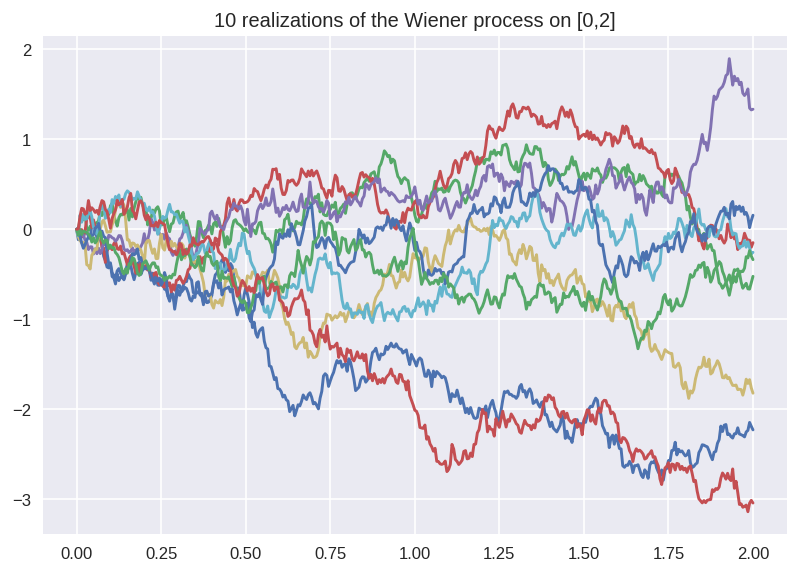

In [21]:
# Plot of M realizations of the Wiener process of [0,T]

T = 2; N = 400; M = 10 #Choisir le M qu'on veut

TT = [T/N*i for i in range(N + 1)]
for i in range(1, M):
  plt.plot(TT, W(T,N))
plt.title(f"{M} realizations of the Wiener process on [0,{T}]")

# II -Schemes and orders of convergence

In [22]:
# Parameters and initial condition
beta = 0.003 ; gamma = 0.1 ; x_0 = 100 ;

# Drift and diffusion coefficients 
a = lambda x : -beta*x*np.log(x) 
b = lambda x : gamma*x
db = lambda x :gamma  # (Derivative of b)

# True solution of the Gompertzian
x = lambda t, w : np.exp(np.log(x_0)*np.exp(-beta*t) \
    - gamma**2/(2*beta)*(1 - np.exp(-beta*t)) \
    + gamma*np.exp(-beta*t)*w)


def EM(T, N, numberOfPaths):
  h = T/N
  wienerPaths = [W(T,N) for i in range(numberOfPaths)]
  results = np.zeros(numberOfPaths)
  for i in range(numberOfPaths):
    Y = x_0
    Wi = wienerPaths[i]
    for j in range(N):
      deltaW = Wi[j+1] - Wi[j]
      Y = Y + a(Y) * h + b(Y) * deltaW
    results[i] = Y
  return results, wienerPaths

def M(T, N, numberOfPaths):
  h = T/N
  wienerPaths = [W(T,N) for i in range(numberOfPaths)]
  results = np.zeros(numberOfPaths)
  for i in range(numberOfPaths):
    Y = x_0
    Wi = wienerPaths[i]
    for j in range(N):
      deltaW = Wi[j+1] - Wi[j]
      Y = Y + a(Y) * h + b(Y) * deltaW + 0.5 * b(Y) * db(Y) * (deltaW**2-h)
    results[i] = Y
  return results, wienerPaths


In [23]:
Q = 10
strong_errors_N_EM = np.zeros(Q); weak_errors_N_EM = np.zeros(Q)
strong_errors_N_M = np.zeros(Q);  weak_errors_N_M = np.zeros(Q)

f_trial_w = lambda x : (1/(1+x**2)) #(Trial function for the weak convergence)
f_trial_w = np.vectorize(f_trial_w)
g=lambda x,w : np.exp(beta*x)

T = 1 ; numberOfPaths =  1500

for q in range(1, Q+1):
  resultsEM, wienerPathsEM = EM(T, 2**q, numberOfPaths)
  resultsM, wienerPathsM = M(T, 2**q, numberOfPaths)

  trueResultsEM = np.array([x(T, I(g, T, 2**q, wienerPathsEM[i])) for i in range(numberOfPaths)])
  trueResultsM = np.array([x(T, I(g, T, 2**q, wienerPathsM[i])) for i in range(numberOfPaths)])

  strong_errors_N_EM[q-1] = np.mean(np.abs(trueResultsEM-resultsEM))
  strong_errors_N_M[q-1] = np.mean(np.abs(trueResultsM-resultsM))
  weak_errors_N_EM[q-1] = np.abs(np.mean(f_trial_w(trueResultsEM))-np.mean(f_trial_w(resultsEM)))
  weak_errors_N_M[q-1] = np.abs(np.mean(f_trial_w(trueResultsM))-np.mean(f_trial_w(resultsM)))

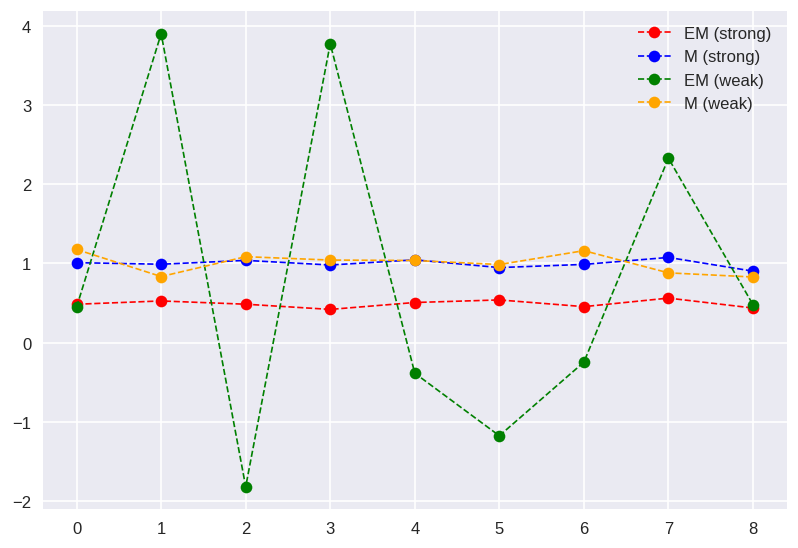

In [24]:
strong_diff_EM = strong_errors_N_EM[:-1]/strong_errors_N_EM[1:]
strong_diff_M =  strong_errors_N_M[:-1]/strong_errors_N_M[1:]
weak_diff_EM =  weak_errors_N_EM[:-1]/weak_errors_N_EM[1:]
weak_diff_M = weak_errors_N_M[:-1]/weak_errors_N_M[1:]

# Plots
plt.plot(np.log(strong_diff_EM)/np.log(2), marker = "o", ls = "--", lw = "1", c = "red") 
plt.plot(np.log(strong_diff_M)/np.log(2), marker = "o", ls = "--", lw = "1", c = "blue")
plt.plot(np.log(weak_diff_EM)/np.log(2), marker = "o", ls = "--", lw = "1", c = "green") 
plt.plot(np.log(weak_diff_M)/np.log(2), marker = "o", ls = "--", lw = "1", c = "orange")
plt.legend(("EM (strong)", "M (strong)", "EM (weak)", "M (weak)")) 

On peut conclure de ce plot que le schema E-M converge fortement à l'ordre 1/2. Quant au schéma de Milshtein, il converge fortement et faiblement à l'ordre 1. Le schema E-M ne converge pas faiblement comme on le voit à travers de la courbe verte.